# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split

### Reading Datasets

In [2]:
books = pd.read_csv("Books.csv")
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv")

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# Data Cleaning

### Droppings URL columns in Books Dataset

In [4]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)

### Renaming Columns

In [5]:
# replacing '-' with '_' and features name in lower case
books.columns= books.columns.str.replace('-', '_')
users.columns= users.columns.str.replace('-', '_')
ratings.columns= ratings.columns.str.replace('-', '_')

In [6]:
books.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### Books Dataset

### Checking Null Values

In [7]:
books.isnull().sum()

ISBN                   0
Book_Title             0
Book_Author            1
Year_Of_Publication    0
Publisher              2
dtype: int64

### Finding Index of Null Values in Books Dataset

In [8]:
books.loc[(books['Book_Author'].isnull()),: ]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [9]:
books.loc[(books['Publisher'].isnull()),: ]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


### Replacing Null Values with Unknown

In [10]:
books.loc[(books['ISBN'] == '9627982032'),'Book_Author'] = 'Unknown'
books.loc[(books['ISBN'] == '193169656X'),'Publisher'] = 'Unknown'
books.loc[(books['ISBN'] == '1931696993'),'Publisher'] = 'Unknown'

### Verifyng Null Values in Books Dataset after filling

In [11]:
books.isnull().sum()

ISBN                   0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
dtype: int64

### Getting Unique Values from Year of Publication

In [12]:
books['Year_Of_Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

### Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'

In [13]:
books[books['Year_Of_Publication'] == 'DK Publishing Inc'] 

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [14]:
books[books['Year_Of_Publication'] == 'Gallimard']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [15]:
books.loc[209538]

ISBN                                                          078946697X
Book_Title             DK Readers: Creating the X-Men, How It All Beg...
Book_Author                                                         2000
Year_Of_Publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/078946697X.0...
Name: 209538, dtype: object

In [16]:
books.loc[221678]

ISBN                                                          0789466953
Book_Title             DK Readers: Creating the X-Men, How Comic Book...
Book_Author                                                         2000
Year_Of_Publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/0789466953.0...
Name: 221678, dtype: object

In [17]:
books.loc[220731]

ISBN                                                          2070426769
Book_Title             Peuple du ciel, suivi de 'Les Bergers\";Jean-M...
Book_Author                                                         2003
Year_Of_Publication                                            Gallimard
Publisher              http://images.amazon.com/images/P/2070426769.0...
Name: 220731, dtype: object

### Function to fix Mismatch Data 

In [18]:
def replace_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [19]:
replace_value(books, 209538, 'Book_Title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_value(books, 209538, 'Book_Author', 'Michael Teitelbaum')
replace_value(books, 209538, 'Year_Of_Publication', 2000)
replace_value(books, 209538, 'Publisher', 'DK Publishing Inc')

replace_value(books, 221678, 'Book_Title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_value(books, 221678, 'Book_Author', 'James Buckley')
replace_value(books, 221678, 'Year_Of_Publication', 2000)
replace_value(books, 221678, 'Publisher', 'DK Publishing Inc')

replace_value(books, 220731,'Book_Title', "Peuple du ciel, suivi de 'Les Bergers")
replace_value(books, 220731, 'Book_Author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_value(books, 220731, 'Year_Of_Publication', 2003)
replace_value(books, 220731, 'Publisher', 'Gallimard')

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


### Verifying Mismatchs After Fixing

In [20]:
books.loc[209538]

ISBN                                                          078946697X
Book_Title             DK Readers: Creating the X-Men, How It All Beg...
Book_Author                                           Michael Teitelbaum
Year_Of_Publication                                                 2000
Publisher                                              DK Publishing Inc
Name: 209538, dtype: object

In [21]:
books.loc[221678]

ISBN                                                          0789466953
Book_Title             DK Readers: Creating the X-Men, How Comic Book...
Book_Author                                                James Buckley
Year_Of_Publication                                                 2000
Publisher                                              DK Publishing Inc
Name: 221678, dtype: object

In [22]:
books.loc[220731]

ISBN                                              2070426769
Book_Title             Peuple du ciel, suivi de 'Les Bergers
Book_Author                  Jean-Marie Gustave Le ClÃ?Â©zio
Year_Of_Publication                                     2003
Publisher                                          Gallimard
Name: 220731, dtype: object

In [23]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book_Title           271360 non-null  object
 2   Book_Author          271360 non-null  object
 3   Year_Of_Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [24]:
books['Year_Of_Publication'] = books['Year_Of_Publication'].astype(str).astype(int)

In [25]:
books.loc[(books['Year_Of_Publication'] > 2023)|(books['Year_Of_Publication'] < 1800)] = np.nan

In [26]:
books['Year_Of_Publication'].fillna((books['Year_Of_Publication'].mean().round(0)), inplace=True)

In [27]:
books['Year_Of_Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984., 1968., 1961., 1958., 1974., 1976., 1971., 1977., 1975.,
       1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966., 1920.,
       1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969., 1954.,
       1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923., 2020.,
       1939., 1926., 1938., 1911., 1904., 1949., 1932., 1928., 1929.,
       1927., 1931., 1914., 1934., 1910., 1933., 1902., 1924., 1921.,
       1900., 1944., 1917., 1901., 2010., 1908., 1906., 1935., 1806.,
       2021., 2012., 2006., 1909., 2008., 1919., 1922., 1897.])

In [28]:
books.duplicated().sum()

4632

In [29]:
books=books.drop_duplicates().reset_index(drop=True)

In [30]:
books.shape

(266728, 5)

In [31]:
books.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


### 1. Who are the Top 10 Authors with Number of Books ?

In [32]:
# Top 10 authors with most books written
Top10_author=books['Book_Author'].value_counts().reset_index().head(10)
Top10_author.rename(columns={'index':'Book_Author','Book_Author':'Count'},inplace=True)
Top10_author

,Book_Author,Count
0,Agatha Christie,598
1,William Shakespeare,559
2,Stephen King,511
3,Ann M. Martin,423
4,Francine Pascal,372
5,Carolyn Keene,372
6,Isaac Asimov,328
7,Nora Roberts,313
8,Barbara Cartland,307
9,Charles Dickens,295


Text(0.5, 1.0, 'Barplot of Top 10 Authors')

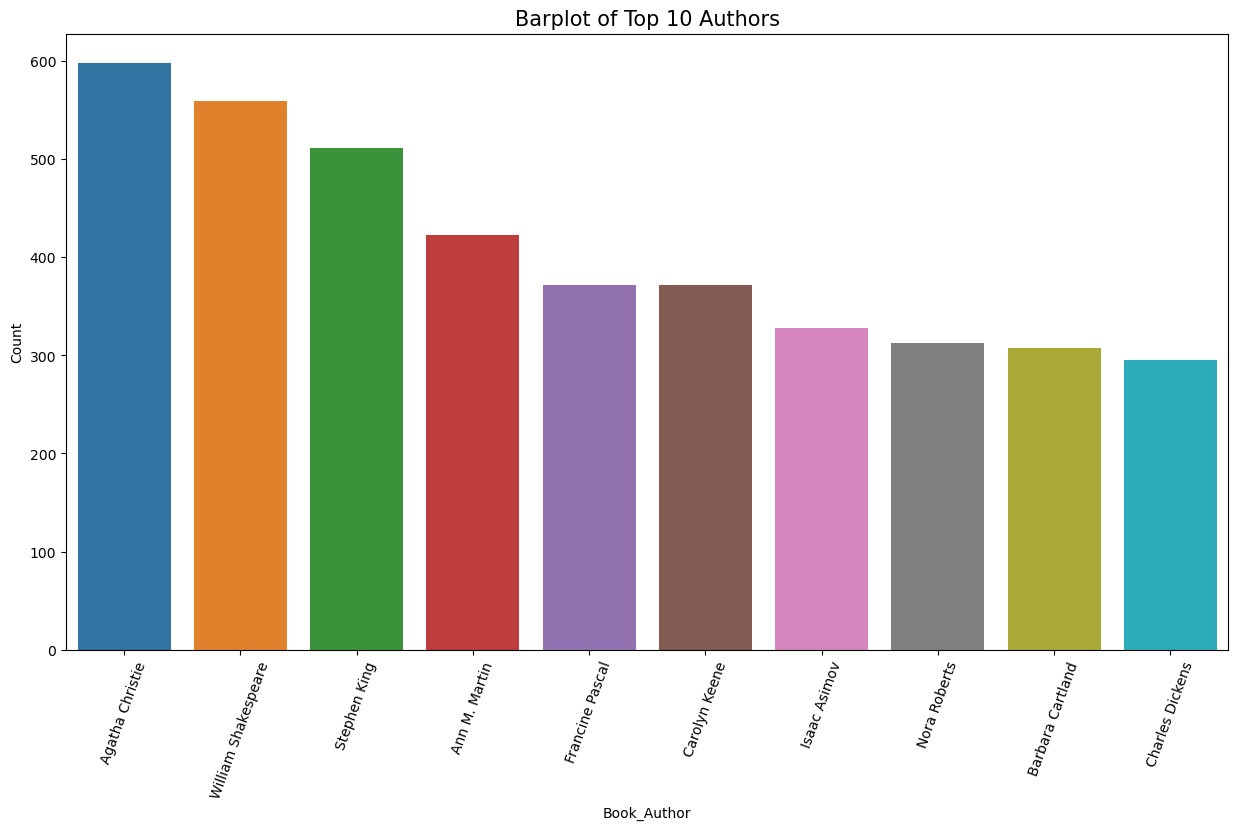

In [33]:
# barplot of Top 10 Authors with most books written
plt.figure(figsize=(15,8))
sns.barplot(x="Book_Author",y="Count",data=Top10_author)
plt.xticks(rotation=70, horizontalalignment="center")
plt.title("Barplot of Top 10 Authors",fontsize=15)

### 2. Which are Top 10 Publishers with published books ?

In [34]:
#Top 10 publisher
Top10_publisher=books['Publisher'].value_counts().reset_index().head(10)
Top10_publisher.rename(columns={'index':'Publisher','Publisher':'Count'},inplace=True)
Top10_publisher

,Publisher,Count
0,Harlequin,7535
1,Silhouette,4220
2,Pocket,3870
3,Ballantine Books,3764
4,Bantam Books,3642
5,Scholastic,3157
6,Simon &amp; Schuster,2965
7,Penguin Books,2843
8,Berkley Publishing Group,2767
9,Penguin USA,2714


Text(0.5, 1.0, 'Barplot of Top 10 Publishers')

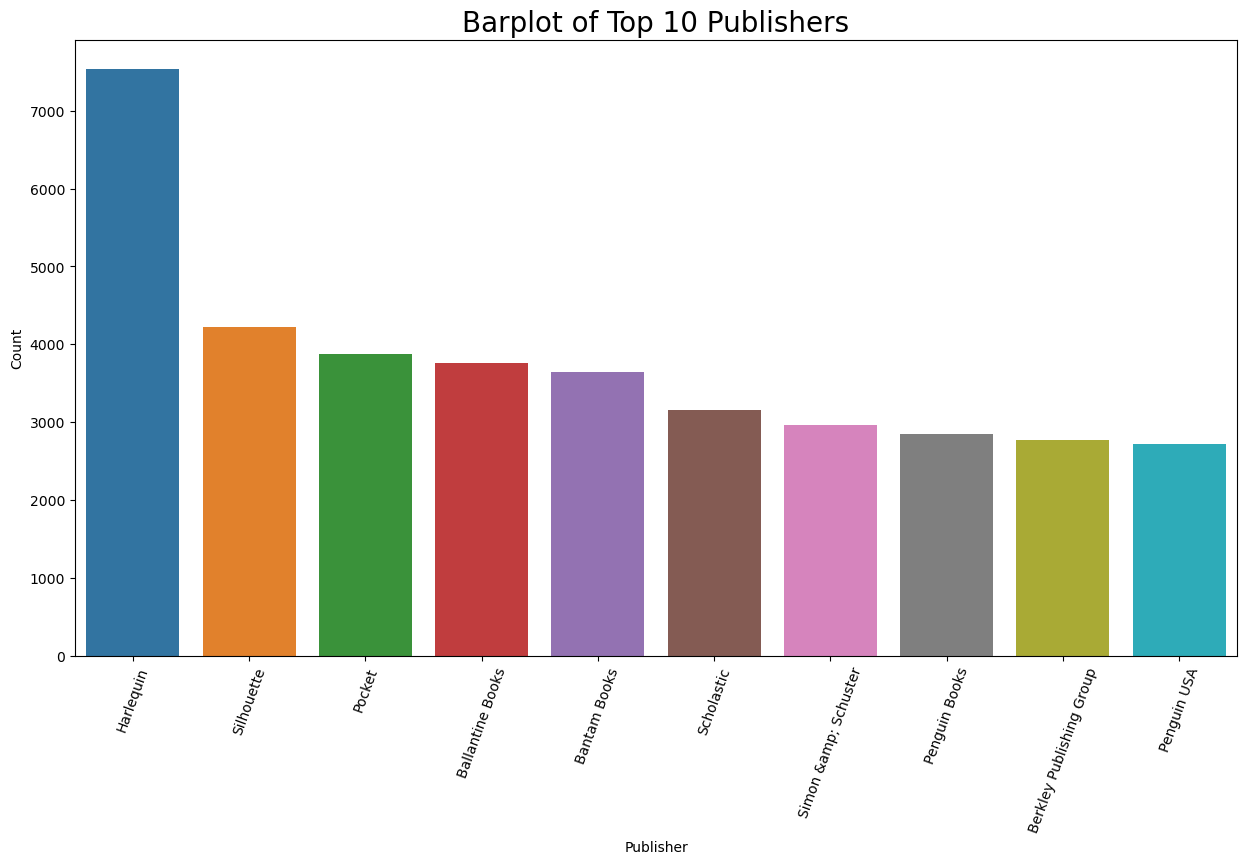

In [35]:
# Barplot of Top 10 Publisher
plt.figure(figsize=(15,8))
sns.barplot(x="Publisher",y="Count",data=Top10_publisher)
plt.xticks(rotation=70, horizontalalignment="center")
plt.title("Barplot of Top 10 Publishers",fontsize=20)

### 3. Number of Books published in yearly.

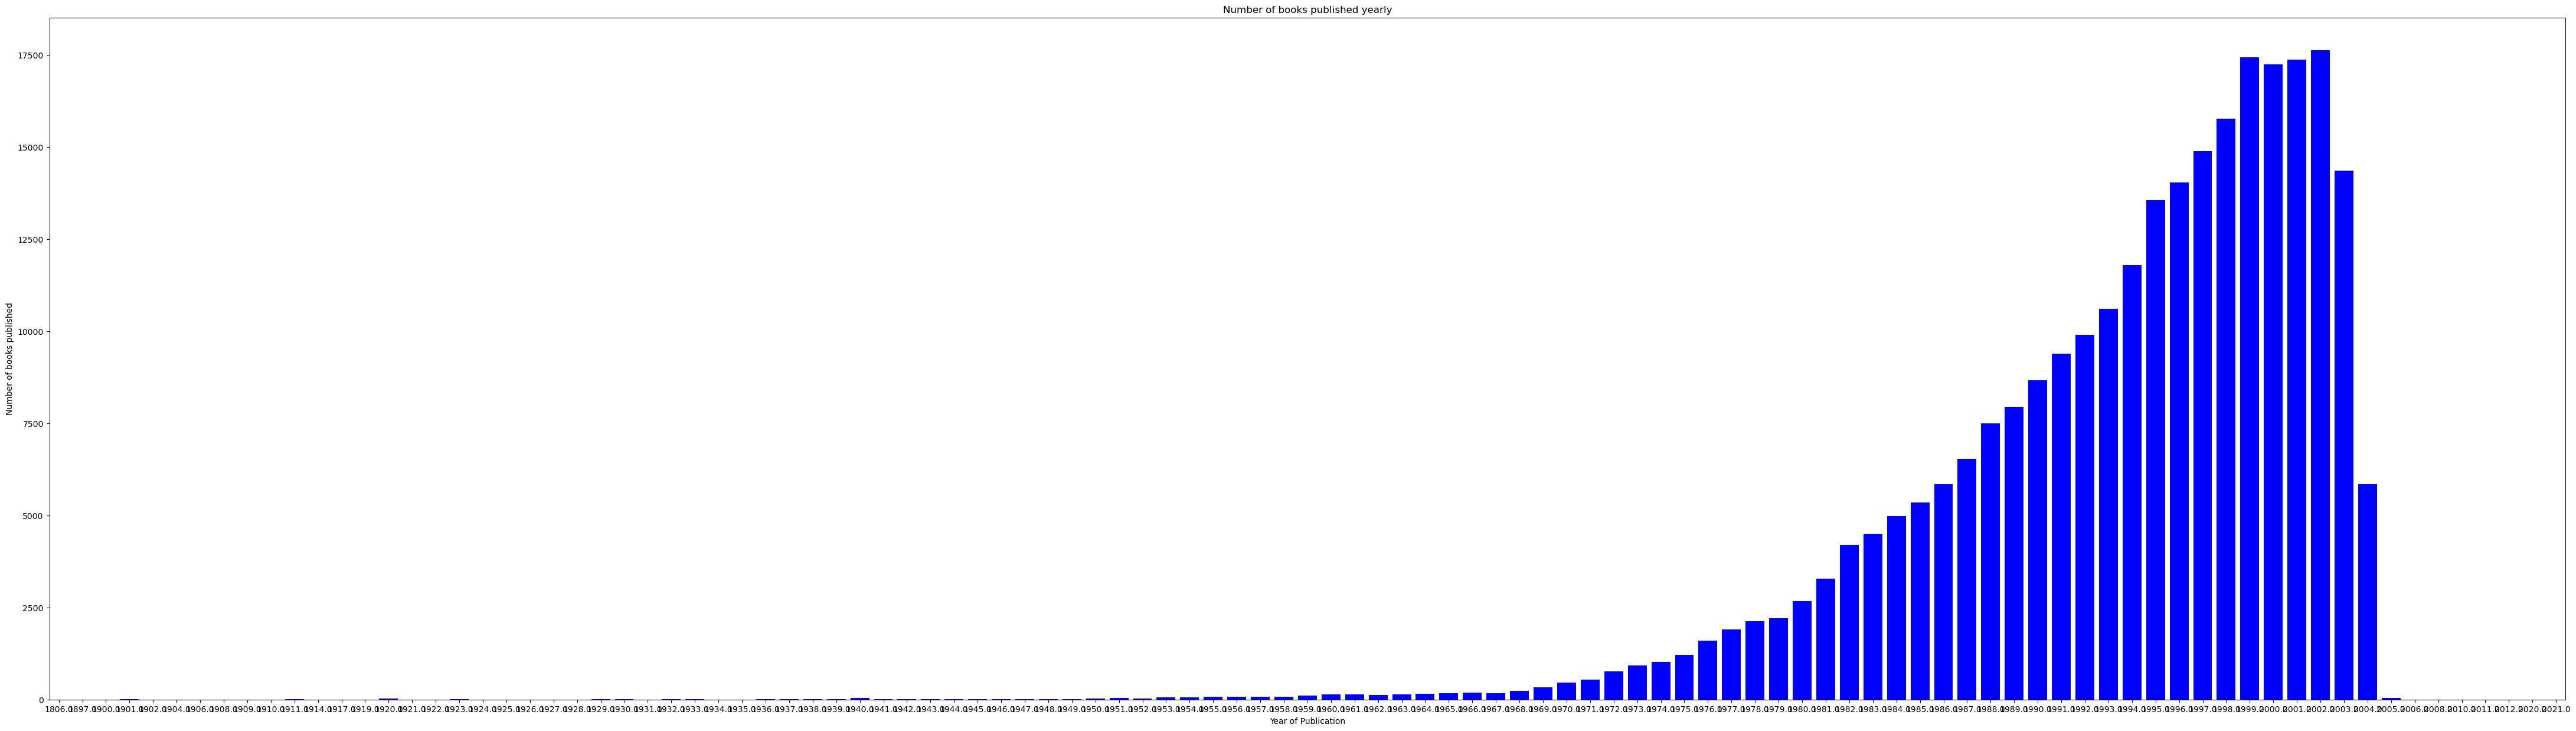

In [36]:
publications = {}
for year in books['Year_Of_Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [37]:
books.Year_Of_Publication = pd.to_numeric(books.Year_Of_Publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = books[books.Year_Of_Publication == 0].Year_Of_Publication.count()
nan_year = books.Year_Of_Publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
books.Year_Of_Publication.replace(0, np.nan, inplace=True)

There are 0 entries as '0', and 0 NaN entries in the Year of Publication field


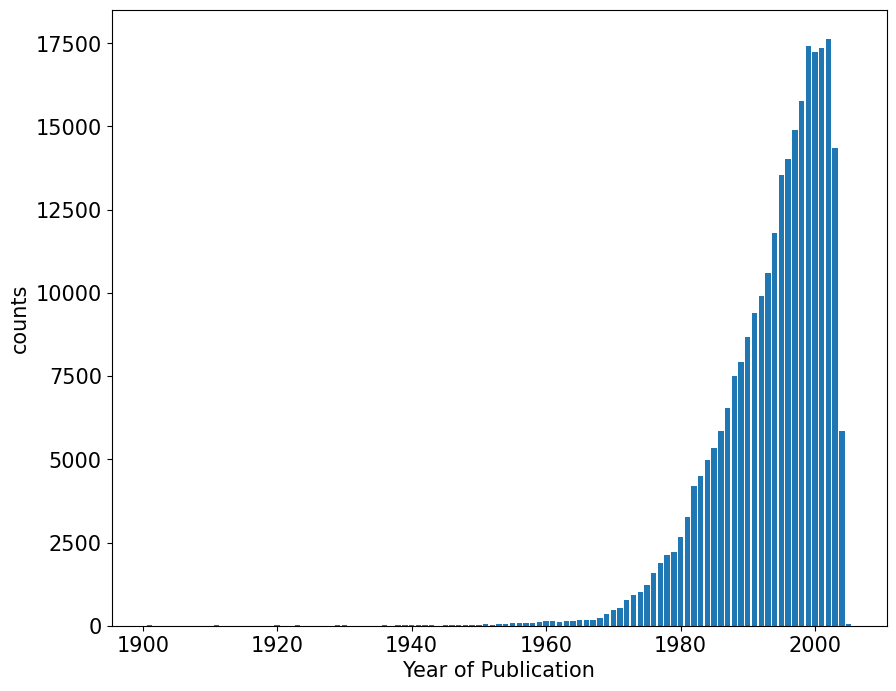

In [38]:
year = books.Year_Of_Publication.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

## 2. Users Dataset

In [39]:
users.isnull().sum()

User_ID          0
Location         0
Age         110762
dtype: int64

In [40]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

### Retrieving Age between 5 to 100 and Filling others with Mean

In [41]:
users.loc[(users['Age'] > 100) | (users['Age'] < 5)] = np.nan

In [42]:
users['Age'].fillna((users['Age'].mean().round(0)), inplace=True)

#### Create an Age Group Column

In [43]:
users['Age_Group'] = pd.cut(users['Age'],
                             bins=[5,13,19,39,59,100],
                             labels=['Childs','Teenagers','Adults','Middle_Age_Adults','Senior_Citizens'],
                             include_lowest=True)

In [44]:
Users_Age_Group=users['Age_Group'].value_counts().reset_index()
Users_Age_Group.rename(columns={'index':'Category','Category':'Count'},inplace=True)
Users_Age_Group

,Category,Age_Group
0,Adults,205438
1,Middle_Age_Adults,45511
2,Teenagers,17612
3,Senior_Citizens,8828
4,Childs,1469


In [45]:
users.shape

(278858, 4)

#### Splitting Location column

In [46]:
#extracting the country names from users
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [47]:
#Displaying the country names
set(users['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [48]:
#correcting the mispelled country names
users.loc[users['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users.loc[users['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users.loc[users['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
users.loc[users['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
users.loc[users['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users.loc[users['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users.loc[users['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)
 


In [49]:
#Converting the country names to uppercase
users['Country']=users['Country'].str.upper()

In [50]:
#Dropping the column 'Location'
users.drop('Location',axis=1,inplace=True)

In [51]:
users.Country.value_counts()

USA           139293
CANADA         21598
UK             18455
GERMANY        16978
SPAIN          13181
               ...  
SICILIA            1
ENGLISH            1
ALACHUA            1
CHINA ÖÐ¹Ú         1
HERNANDO           1
Name: Country, Length: 469, dtype: int64

In [52]:
users.head()

,User_ID,Age,Age_Group,Country
0,1.0,35.0,Adults,USA
1,2.0,18.0,Teenagers,USA
2,3.0,35.0,Adults,RUSSIA
3,4.0,17.0,Teenagers,PORTUGAL
4,5.0,35.0,Adults,UK


Text(0.5, 1.0, 'No of readers from each country (Top 10)')

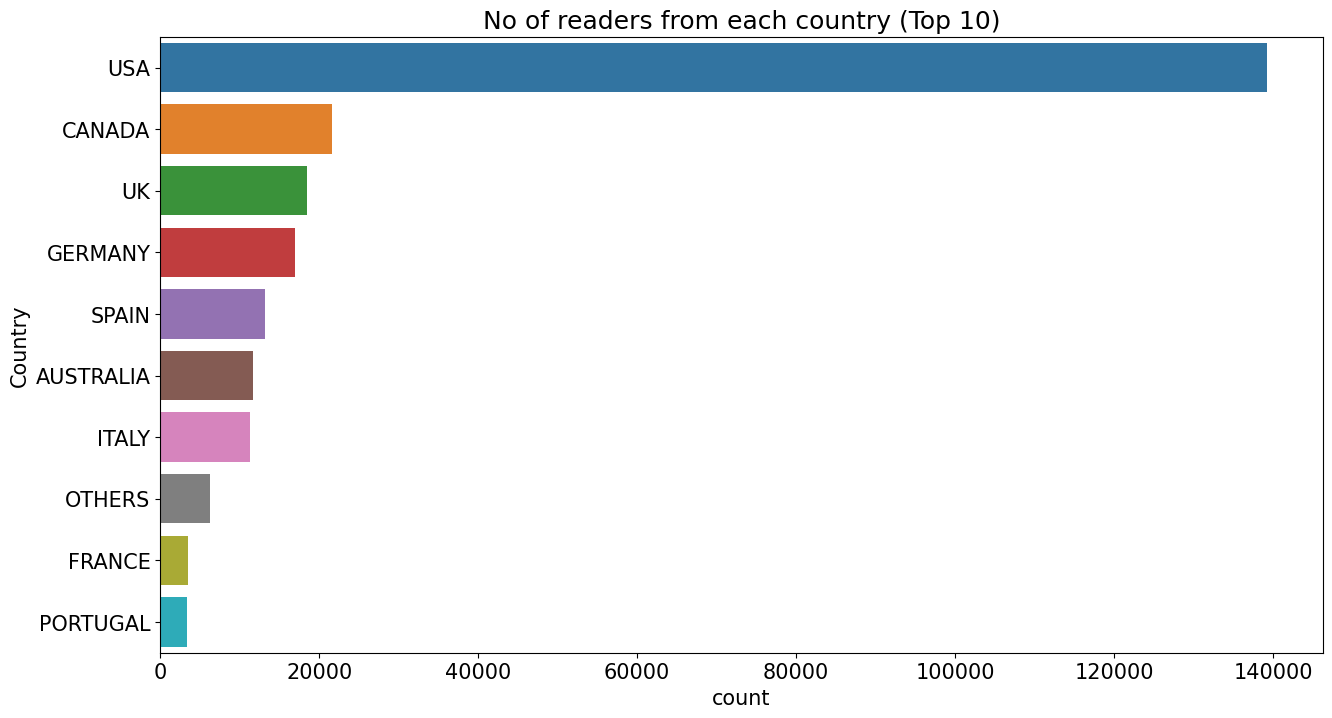

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(y="Country", data=users, order=users['Country'].value_counts().index[0:10])
plt.title("No of readers from each country (Top 10)")

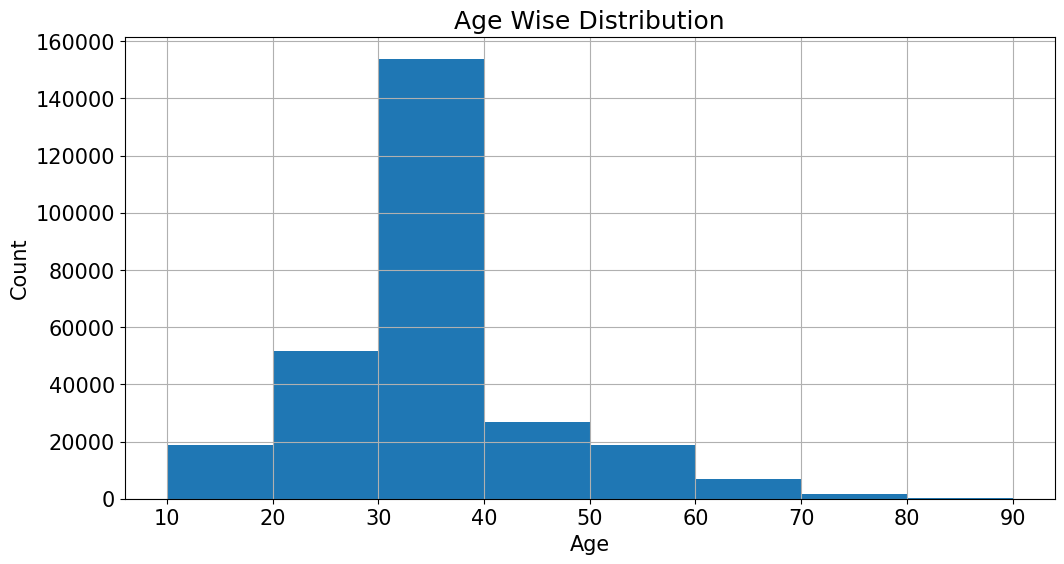

In [54]:
plt.figure(figsize=(12,6))
users.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Wise Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show() 

###  Age Distribution of User Datasets

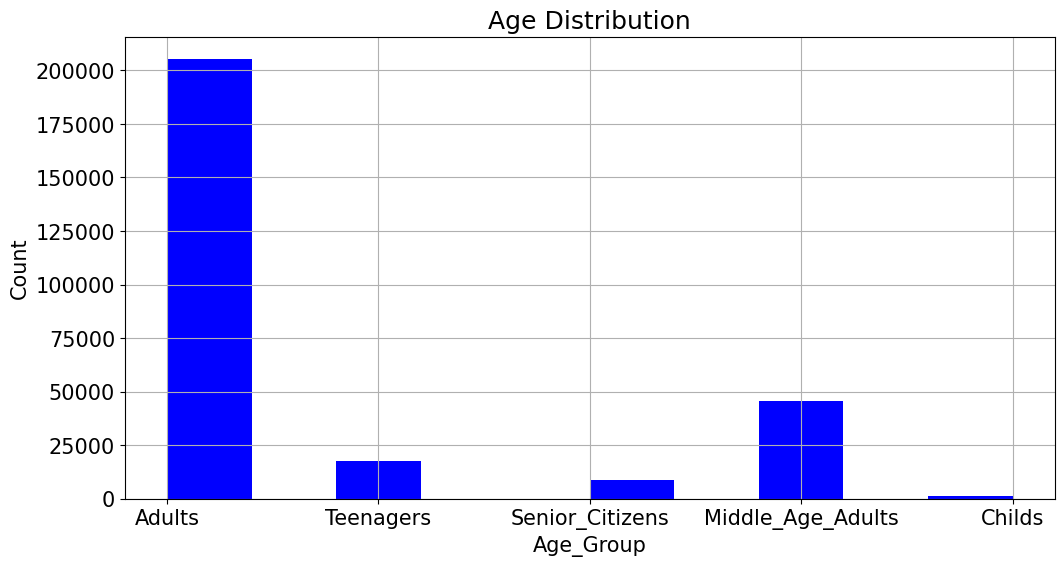

In [55]:
plt.figure(figsize=(12,6))
users.Age_Group.hist(color = 'blue') 
plt.title('Age Distribution')
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.show()

## 3. Ratings Dataset

In [56]:
ratings.isnull().sum()

User_ID        0
ISBN           0
Book_Rating    0
dtype: int64

In [57]:
ratings.duplicated().sum()

0

In [58]:
Unique_Rating = ratings['Book_Rating'].unique()
Unique_Rating

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [59]:
ratings.shape

(1149780, 3)

In [60]:
ratings.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


###  Histogram Of Book-Ratings (Excluding 0 rating count)

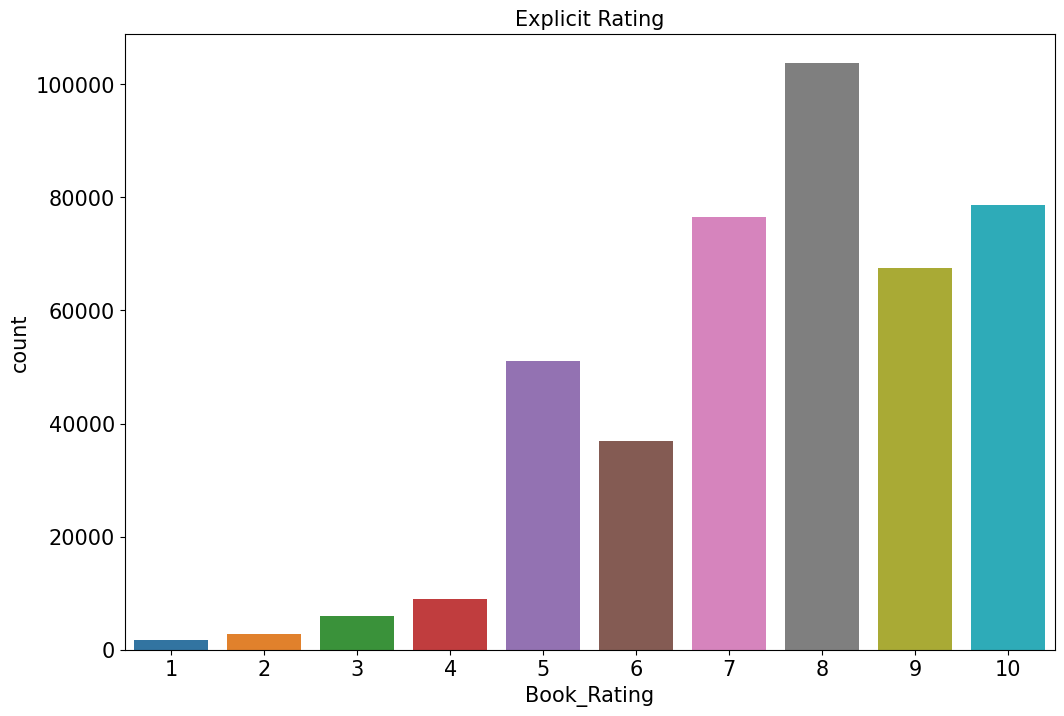

In [61]:
# Histogram Of Book-Rating excluding rating equal to zero
ratings1= ratings[ratings['Book_Rating'] != 0]
plt.figure(figsize=(12,8))
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.title("Explicit Rating",fontsize=15)
sns.countplot(x="Book_Rating", data=ratings1)
plt.show()

## Data Merging

In [62]:
final=pd.merge(books,ratings, on='ISBN',how='inner')
final=pd.merge(final,users,on='User_ID',how='inner')

In [63]:
final['Year_Of_Publication'] = final['Year_Of_Publication'].astype(float).astype(int)
final['Age'] = final['Age'].astype(float).astype(int)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012558 entries, 0 to 1012557
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   ISBN                 1012558 non-null  object  
 1   Book_Title           1012558 non-null  object  
 2   Book_Author          1012558 non-null  object  
 3   Year_Of_Publication  1012558 non-null  int32   
 4   Publisher            1012558 non-null  object  
 5   User_ID              1012558 non-null  int64   
 6   Book_Rating          1012558 non-null  int64   
 7   Age                  1012558 non-null  int32   
 8   Age_Group            1012558 non-null  category
 9   Country              1012558 non-null  object  
dtypes: category(1), int32(2), int64(2), object(5)
memory usage: 70.5+ MB


In [64]:
final.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,Age_Group,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,Teenagers,USA
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35,Adults,CANADA
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,35,Adults,CANADA
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,35,Adults,CANADA
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,35,Adults,CANADA


In [65]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012558 entries, 0 to 1012557
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   ISBN                 1012558 non-null  object  
 1   Book_Title           1012558 non-null  object  
 2   Book_Author          1012558 non-null  object  
 3   Year_Of_Publication  1012558 non-null  int32   
 4   Publisher            1012558 non-null  object  
 5   User_ID              1012558 non-null  int64   
 6   Book_Rating          1012558 non-null  int64   
 7   Age                  1012558 non-null  int32   
 8   Age_Group            1012558 non-null  category
 9   Country              1012558 non-null  object  
dtypes: category(1), int32(2), int64(2), object(5)
memory usage: 70.5+ MB


In [66]:
len(final['Book_Title'].unique())

236904

In [67]:
len(final['User_ID'].unique())

90306

In [68]:
final.tail()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,Age_Group,Country
1012553,087004124X,Anthem,Ayn Rand,1966,Caxton Press,259589,8,19,Teenagers,USA
1012554,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,259591,8,39,Adults,USA
1012555,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,259614,10,22,Adults,SPAIN
1012556,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998,American Library Association,259679,6,27,Adults,USA
1012557,3423300965,Texte zur Ethik.,Dieter Birnbacher,2003,Dtv,259920,0,35,Adults,GERMANY


In [69]:
final[['User_ID','Book_Title','ISBN']].duplicated().sum()

0

In [70]:
final[['User_ID','Book_Author','ISBN']].duplicated().sum()

0

In [71]:
# Explicit Ratings Dataset
final1 = final[final['Book_Rating'] != 0]
final1 = final1.reset_index(drop = True)

In [72]:
final1.shape

(376478, 10)

In [73]:
# Implicit Ratings Dataset
final2 = final[final['Book_Rating'] == 0]
final2 = final2.reset_index(drop = True)

In [74]:
# Creating column Average Rating
final1['Avg_Rating']=final1.groupby('ISBN')['Book_Rating'].transform('mean')
# Creating column Rating sum
final1['Total_No_Of_Users_Rated']=final1.groupby('ISBN')['Book_Rating'].transform('count')
final1.shape

(376478, 12)

In [75]:
final1.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,Age_Group,Country,Avg_Rating,Total_No_Of_Users_Rated
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35,Adults,CANADA,7.666667,9
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,35,Adults,CANADA,5.000000,1
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,35,Adults,CANADA,5.000000,1
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,35,Adults,CANADA,5.000000,1
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,35,Adults,CANADA,6.000000,1


### Top and Least Rated Books Overall

In [76]:
Top_rated_books = final1[['Book_Title','Book_Rating']]
Top_rated_books = Top_rated_books.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
Top_rated_books = Top_rated_books.sort_values('Book_Rating',ascending=False).reset_index()
Top_rated_books = Top_rated_books[['Book_Title','Book_Rating']]

Top_rated_books.head()

,Book_Title,Book_Rating
0,The Alias Man,10.0
1,Electric Shock Showdown (Special Edition Story...,10.0
2,El Juego de Los Abalorios,10.0
3,The Trolley Car Family,10.0
4,Sons of Texas : Callaway Country,10.0


In [77]:
Top_rated_books.tail()

,Book_Title,Book_Rating
132984,The Little Book of Stupid Questions: 300 Hilar...,1.0
132985,The Starr Report: The Findings of Independent ...,1.0
132986,"Bedouin, Settlers and Holiday-Makers: Egypt's ...",1.0
132987,Human Heritage,1.0
132988,Hochglanzweiber.,1.0


### Average Rating of Most Read Books Overall

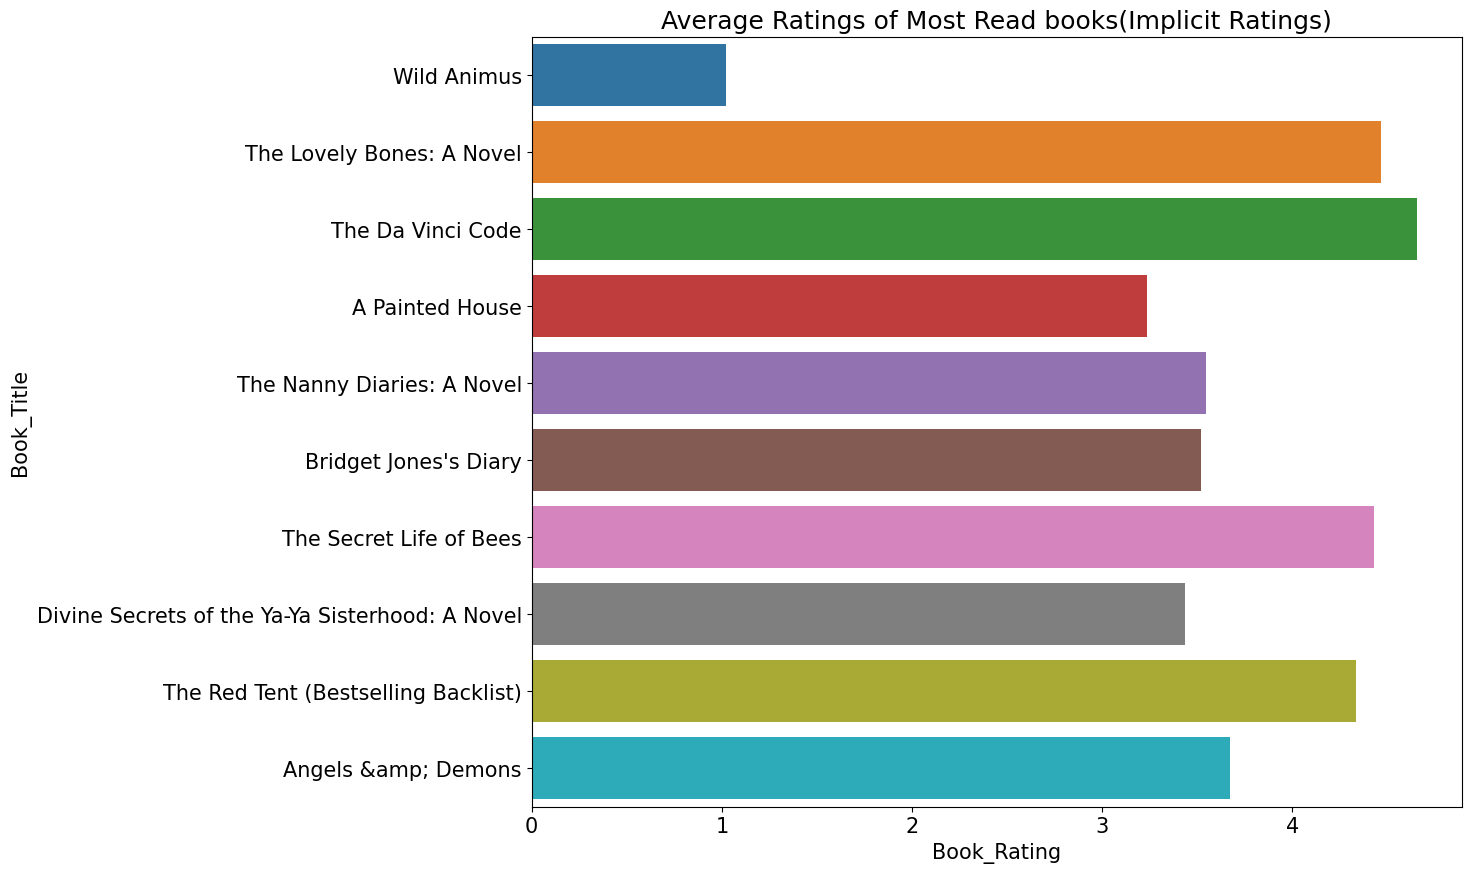

In [78]:
final_avg_data = final.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
temp0 = final.Book_Title.value_counts().reset_index()
temp0.columns = ['Book_Title','Count']
most_rated_by_readers_final = pd.merge(final_avg_data,temp0,on='Book_Title')

most_rated_by_readers_final = most_rated_by_readers_final.sort_values('Count',ascending=False)

plt.figure(figsize=(12,10))
plt.title("Average Ratings of Most Read books(Implicit Ratings)")
sns.barplot(x = 'Book_Rating', y = 'Book_Title', data = most_rated_by_readers_final.head(10));

#### Top 5 most popular books

<Axes: title={'center': '\nMost popular books\n'}, xlabel='Count', ylabel='Book_Title'>

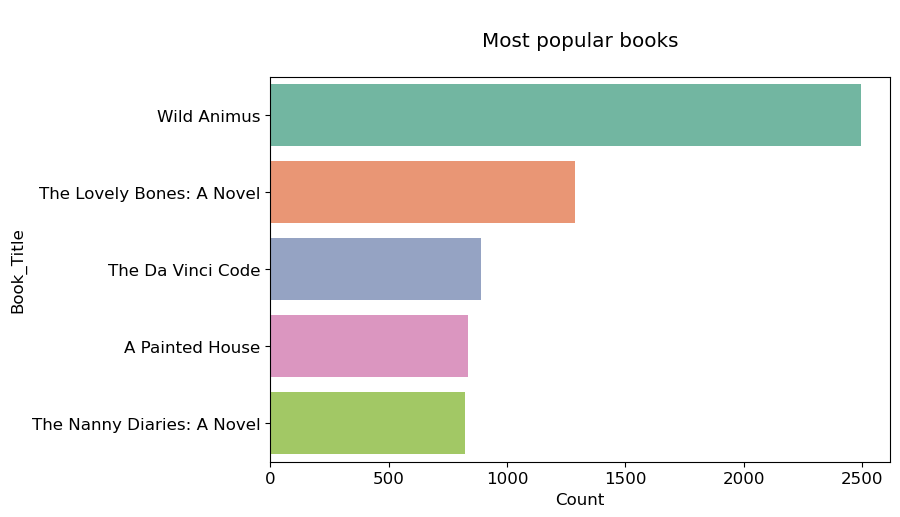

In [79]:
popular = final.groupby('Book_Title')['Book_Rating'].count().reset_index().sort_values(by='Book_Rating', ascending=False)[:5]
popular.columns = ['Book_Title', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='Book_Title', x='Count',palette='Set2')

#### Most Popular Author

<Axes: title={'center': '\nMost popular Authors\n'}, xlabel='Book_Rating', ylabel='Book_Author'>

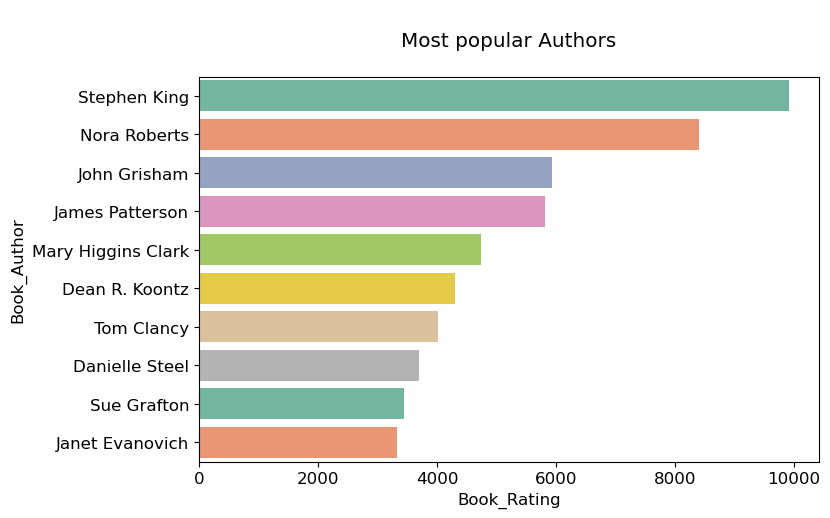

In [80]:
author = final.groupby('Book_Author')['Book_Rating'].count().reset_index().sort_values(by='Book_Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book_Author', x='Book_Rating',palette='Set2')

#### Publisher with most books

<Axes: xlabel='Book_Title', ylabel='Publisher'>

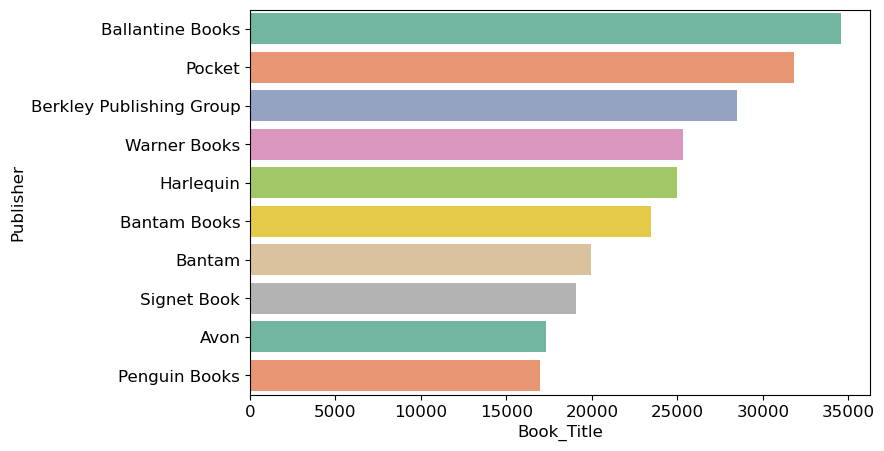

In [81]:
publishers = final.groupby('Publisher')['Book_Title'].count().reset_index().sort_values(by='Book_Title', ascending=False)[:10]
plt.figure(figsize=[8, 5])
sns.barplot(data=publishers, x='Book_Title', y='Publisher',palette='Set2')    

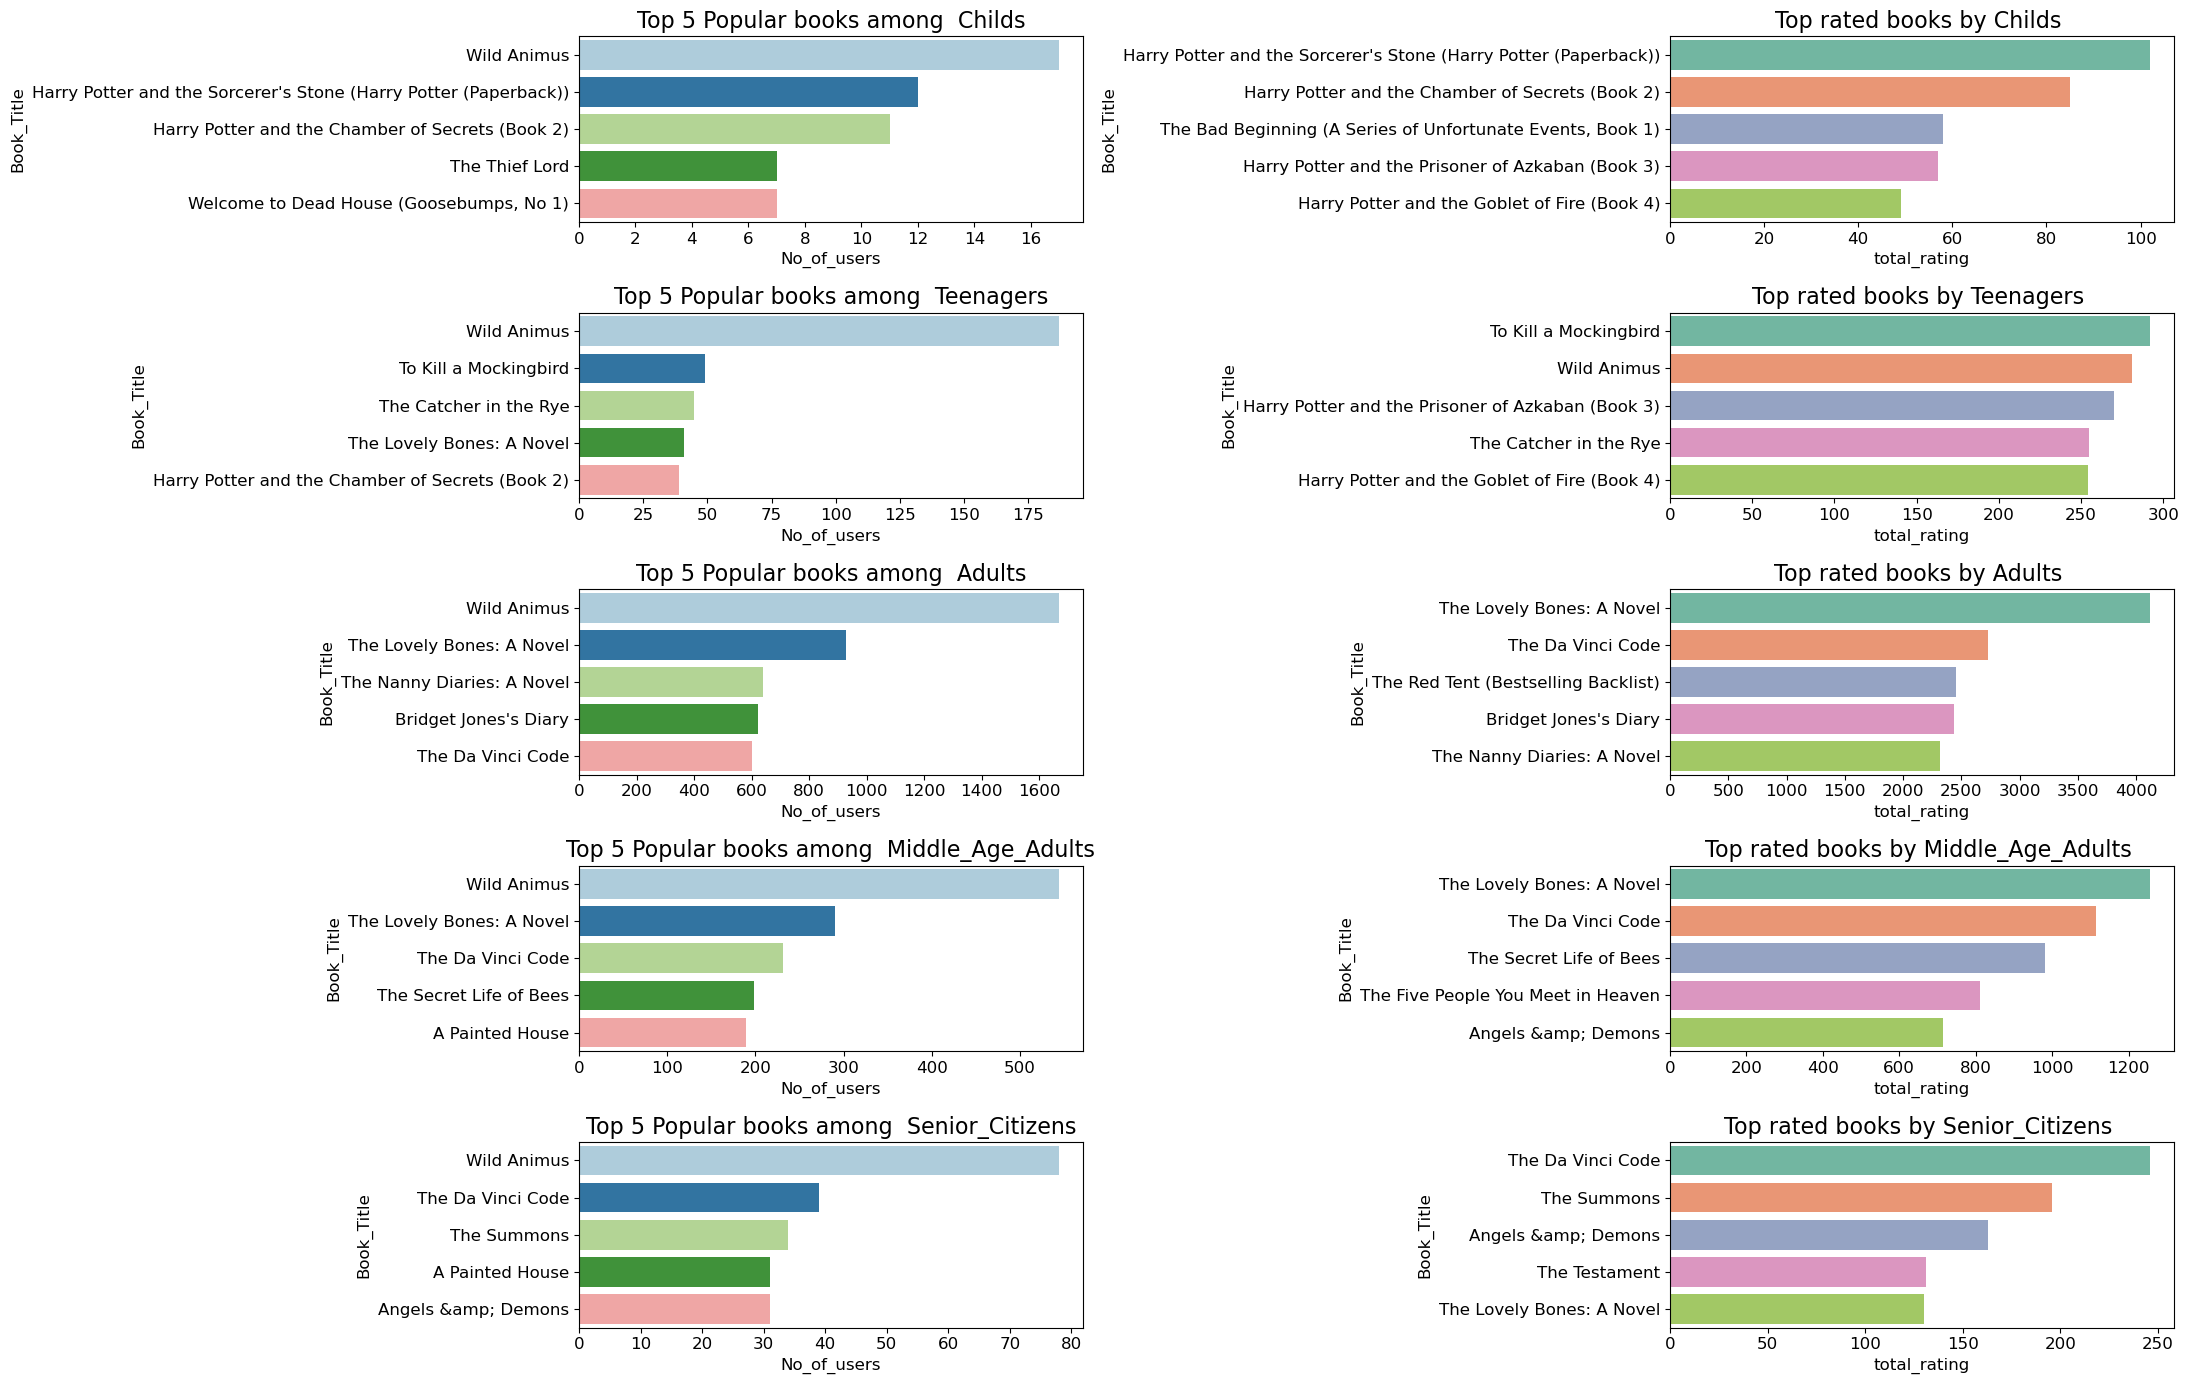

In [82]:
fig=plt.figure(figsize=(22,14))
i=1
for group  in ['Childs','Teenagers','Adults','Middle_Age_Adults','Senior_Citizens']:
  age_df=final.loc[final['Age_Group']==group].groupby(['Book_Title']).agg(No_of_users=('User_ID','nunique'),total_rating=('Book_Rating','sum')).reset_index() 
  plt.subplot(5,2,i)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book_Title',palette='Paired',data=age_df.head(5))
  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book_Title',palette='Set2',data=age_df.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1
  
plt.tight_layout()

In [83]:
Top3_Countries=final['Country'].value_counts().reset_index().head(3)
Top3_Countries.rename(columns={'index':'Country_Name','Country_Name':'Count'},inplace=True)
Top3_Countries.head()

,Country_Name,Country
0,USA,739375
1,CANADA,91648
2,OTHERS,35265


### 1. USA 

In [84]:
Top_Country_Names = Top3_Countries.iloc[0, 0]
Country_USA = final[final['Country'] == Top_Country_Names].copy().reset_index()
Country_USA.shape

(739375, 11)

In [85]:
Country_USA.drop(['index','Country'], axis= 1, inplace= True)

In [86]:
Country_USA.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,Age_Group
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,Teenagers
1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,2954,8,71,Senior_Citizens
2,0440235502,October Sky: A Memoir,Homer Hickam,1999,Dell,2954,10,71,Senior_Citizens
3,0380973499,War's End: An Eyewitness Account of America's ...,Charles W. Sweeney,1997,William Morrow &amp; Company,2954,7,71,Senior_Citizens
4,0684867184,"Comrades : Brothers, Fathers, Heroes, Sons, Pals",Stephen E. Ambrose,1999,Simon &amp; Schuster,2954,0,71,Senior_Citizens


In [87]:
Top_rated_books_usa = Country_USA[['Book_Title','Book_Rating']]
Top_rated_books_usa = Top_rated_books_usa.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
Top_rated_books_usa = Top_rated_books_usa.sort_values('Book_Rating',ascending=False).reset_index()
Top_rated_books_usa = Top_rated_books_usa[['Book_Title','Book_Rating']]

Top_rated_books_usa.head()

,Book_Title,Book_Rating
0,They Say You're Crazy: How the World's Most Po...,10.0
1,Opportunities in Foreign Language Careers,10.0
2,The Tale of Peter Rabbit (Little Books of Beat...,10.0
3,Suppressed,10.0
4,Supposes,10.0


### Average Rating of Most Read Books

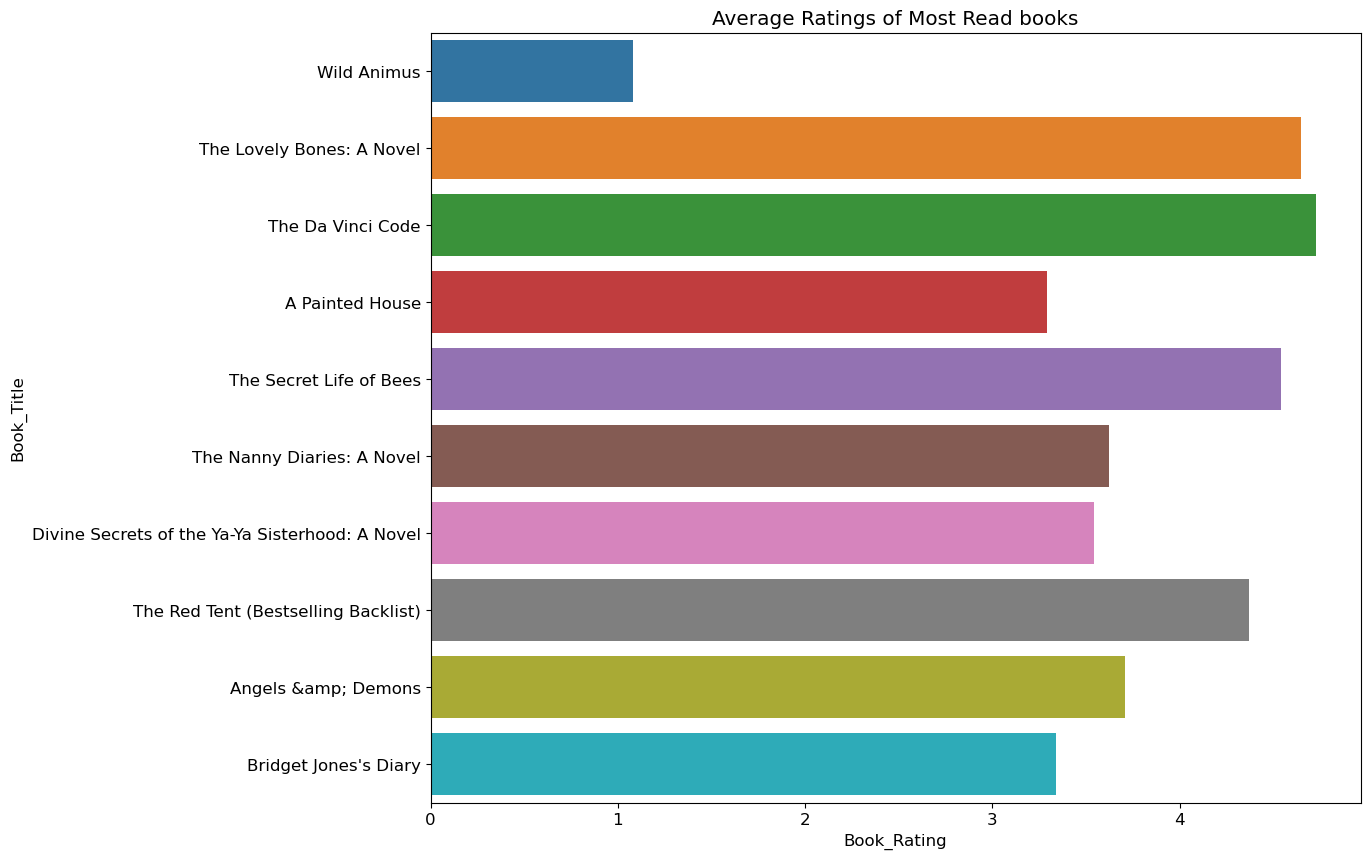

In [88]:
usa_avg_data = Country_USA.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
temp1 = Country_USA.Book_Title.value_counts().reset_index()
temp1.columns = ['Book_Title','Count']
most_rated_by_readers_usa = pd.merge(usa_avg_data,temp1,on='Book_Title')

most_rated_by_readers_usa = most_rated_by_readers_usa.sort_values('Count',ascending=False)

plt.figure(figsize=(12,10))
plt.title("Average Ratings of Most Read books")
sns.barplot(x = 'Book_Rating', y = 'Book_Title', data = most_rated_by_readers_usa.head(10));

### 2. Canada

In [89]:
Top_Country_Names = Top3_Countries.iloc[1, 0]
Country_Canada = final[final['Country'] == Top_Country_Names].copy().reset_index()
Country_Canada.shape

(91648, 11)

In [90]:
Country_Canada.drop(['index','Country'], axis= 1, inplace= True)

In [91]:
Country_Canada.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,Age_Group
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35,Adults
1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,35,Adults
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,35,Adults
3,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,35,Adults
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0,35,Adults


In [92]:
Top_rated_books_canada = Country_Canada[['Book_Title','Book_Rating']]
Top_rated_books_canada = Top_rated_books_canada.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
Top_rated_books_canada = Top_rated_books_canada.sort_values('Book_Rating',ascending=False).reset_index()
Top_rated_books_canada = Top_rated_books_canada[['Book_Title','Book_Rating']]

Top_rated_books_canada.head()

,Book_Title,Book_Rating
0,Psalms 1-72 (Collegeville Bible Commentary Old...,10.0
1,The Circle of Simplicity: Return to the Good Life,10.0
2,Meeting Milo,10.0
3,"Huntress Night World 7 (Night World , No 7)",10.0
4,Meeting God: Elements of Hindu Devotion,10.0


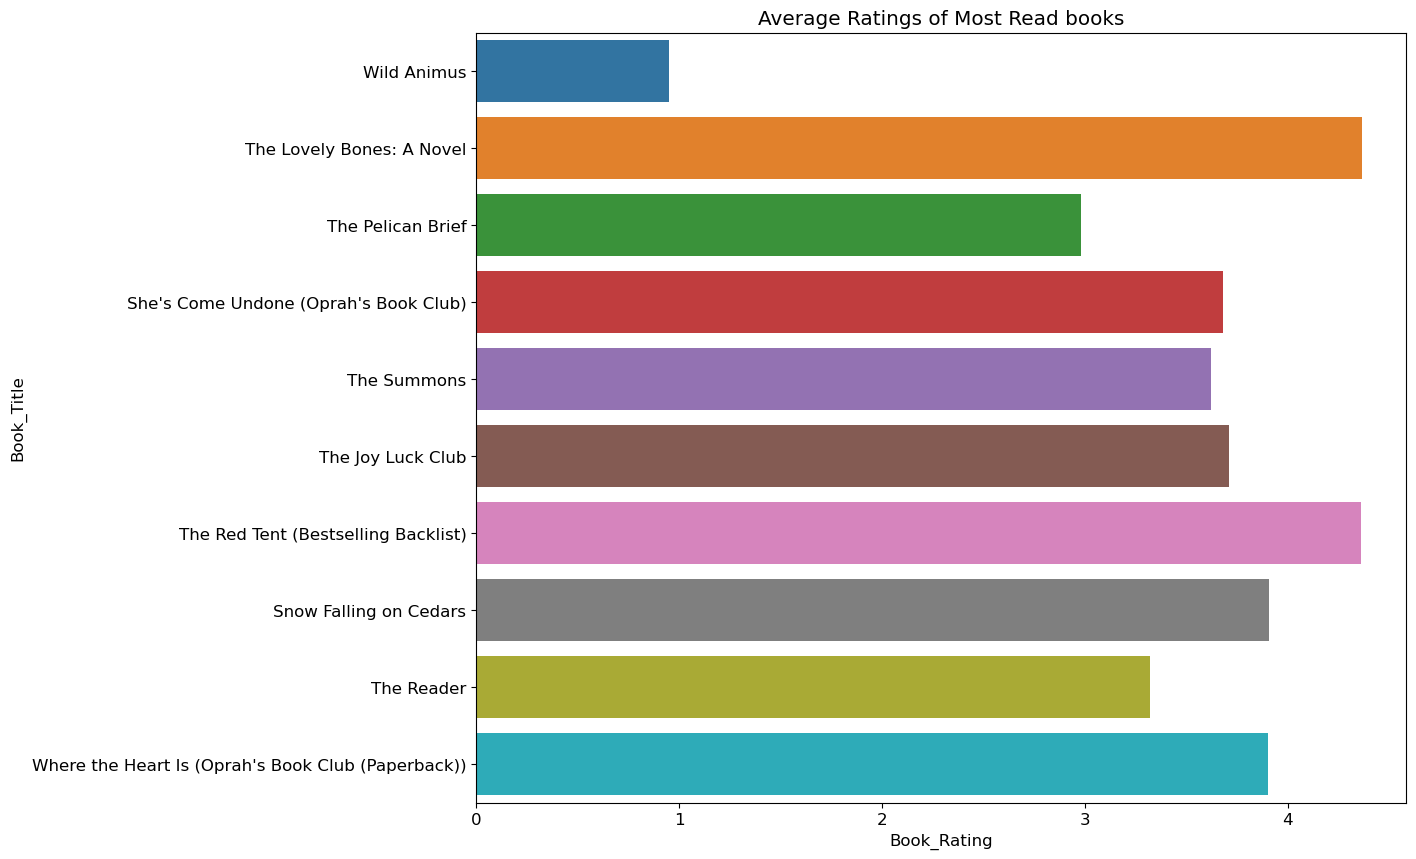

In [93]:
canada_avg_data = Country_Canada.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
temp2 = Country_Canada.Book_Title.value_counts().reset_index()
temp2.columns = ['Book_Title','Count']
most_rated_by_readers_canada = pd.merge(canada_avg_data,temp2,on='Book_Title')

most_rated_by_readers_canada = most_rated_by_readers_canada.sort_values('Count',ascending=False)

plt.figure(figsize=(12,10))
plt.title("Average Ratings of Most Read books")
sns.barplot(x = 'Book_Rating', y = 'Book_Title', data = most_rated_by_readers_canada.head(10));

### 3. United Kingdom

In [94]:
Top_Country_Names = Top3_Countries.iloc[2, 0]
Country_UK = final[final['Country'] == Top_Country_Names].copy().reset_index()
Country_UK.shape

(35265, 11)

In [95]:
Country_UK.drop(['index','Country'], axis= 1, inplace= True)

In [96]:
Country_UK.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,Age_Group
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8,35,Adults
1,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,35,Adults
2,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,11676,8,35,Adults
3,0771074670,Nights Below Station Street,David Adams Richards,1988,Emblem Editions,11676,0,35,Adults
4,0440234743,The Testament,John Grisham,1999,Dell,11676,9,35,Adults


In [97]:
Top_rated_books_uk = Country_UK[['Book_Title','Book_Rating']]
Top_rated_books_uk = Top_rated_books_uk.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
Top_rated_books_uk = Top_rated_books_uk.sort_values('Book_Rating',ascending=False).reset_index()
Top_rated_books_uk = Top_rated_books_uk[['Book_Title','Book_Rating']]

Top_rated_books_uk.head()

,Book_Title,Book_Rating
0,Plains of Passage (Earth's Children),10.0
1,Unto a Good Land,10.0
2,How Do They Do That?,10.0
3,Campbell's Simply Delicious Recipes,10.0
4,Opening the Bible,10.0


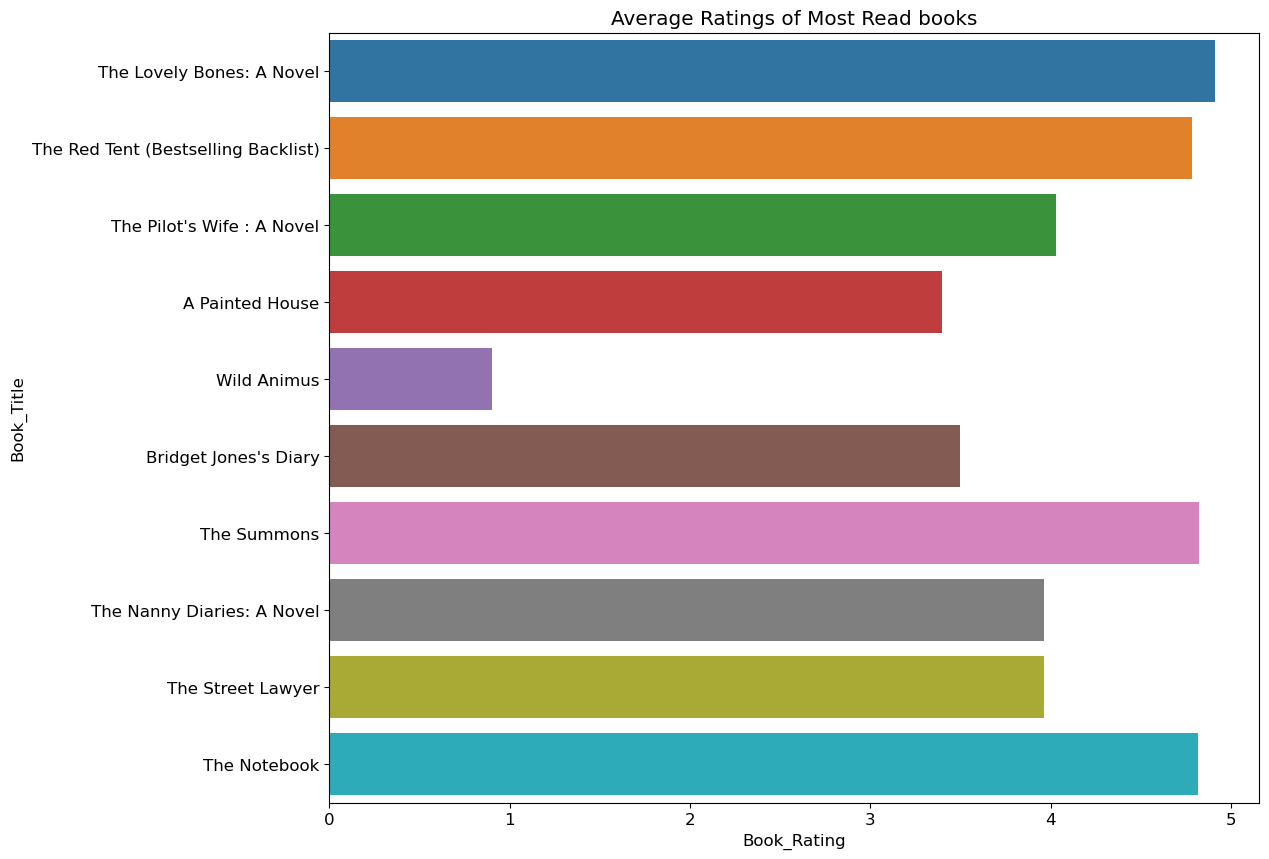

In [98]:
uk_avg_data = Country_UK.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
temp3 = Country_UK.Book_Title.value_counts().reset_index()
temp3.columns = ['Book_Title','Count']
most_rated_by_readers_uk = pd.merge(uk_avg_data,temp3,on='Book_Title')

most_rated_by_readers_uk = most_rated_by_readers_uk.sort_values('Count',ascending=False)

plt.figure(figsize=(12,10))
plt.title("Average Ratings of Most Read books")
sns.barplot(x = 'Book_Rating', y = 'Book_Title', data = most_rated_by_readers_uk.head(10));

### 4. India

In [99]:
Temp4 = final.loc[final['Country'].str.contains('INDIA')]
Country_Ind=pd.DataFrame(Temp4).reset_index()
Country_Ind.drop(['index','Country'], axis= 1, inplace= True)
Country_Ind.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,Age_Group
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,193,0,23,Adults
1,0971880107,Wild Animus,Rich Shapero,2004,Too Far,11768,8,14,Teenagers
2,0971880107,Wild Animus,Rich Shapero,2004,Too Far,130591,0,27,Adults
3,044920846X,Love,Leo Buscaglia,1994,Fawcett Books,130591,6,27,Adults
4,0671657518,HT STOP WORRYING R,Dale Carnegie,1987,Pocket,130591,9,27,Adults


In [100]:
Country_Ind.shape

(132, 9)

In [101]:
Top_rated_books_Ind = Country_Ind[['Book_Title','Book_Rating']]
Top_rated_books_Ind = Top_rated_books_Ind.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
Top_rated_books_Ind = Top_rated_books_Ind.sort_values('Book_Rating',ascending=False).reset_index()
Top_rated_books_Ind = Top_rated_books_Ind[['Book_Title','Book_Rating']]

Top_rated_books_Ind.head()

,Book_Title,Book_Rating
0,If Tomorrow Comes,10.0
1,"The Art of Prolog, Second Edition: Advanced Pr...",10.0
2,Expert C Programming,10.0
3,The Living Planet: A Portrait of the Earth,10.0
4,From the Mixed-Up Files of Mrs. Basil E. Frank...,10.0


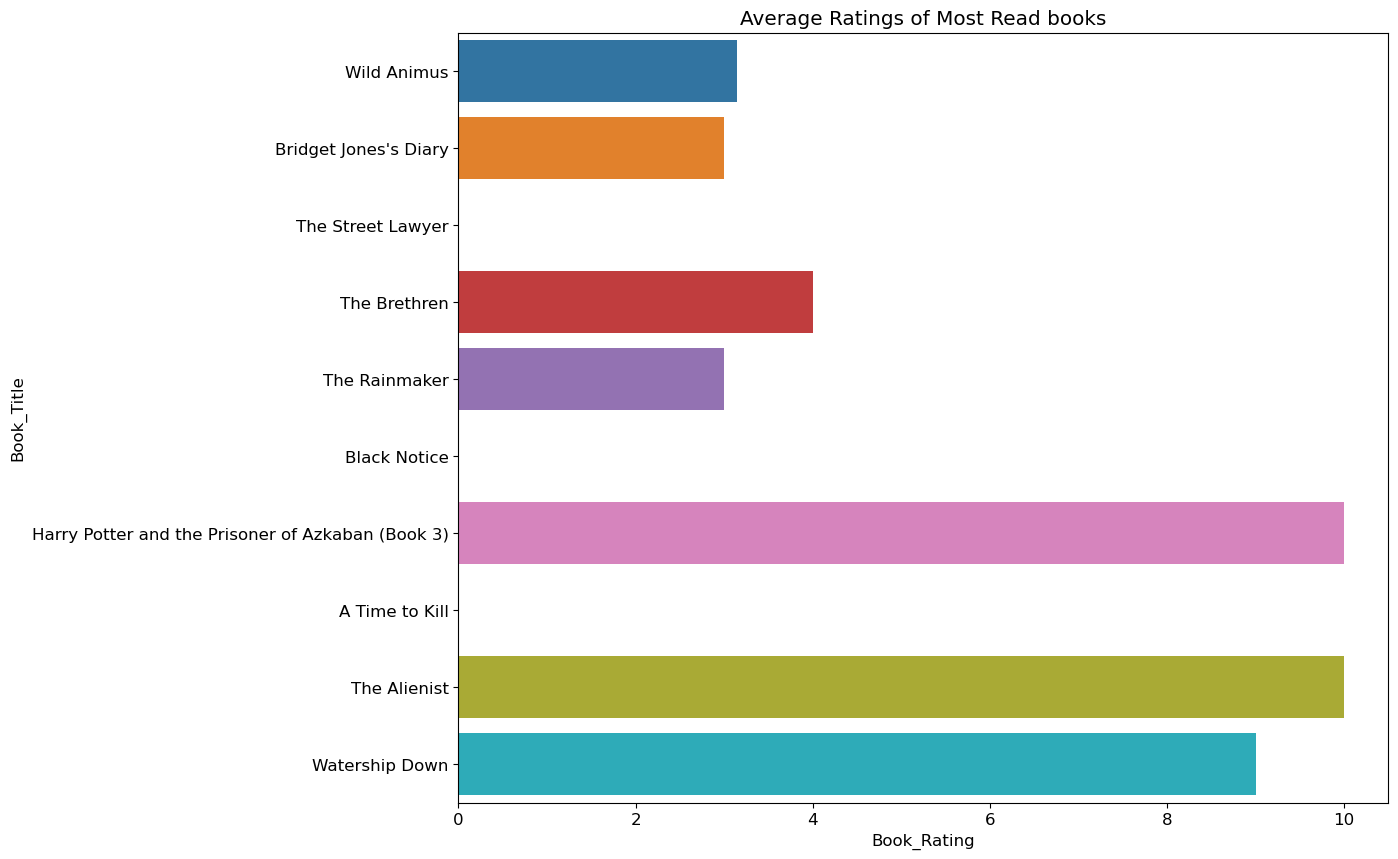

In [102]:
Ind_avg_data = Country_Ind.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
temp4 = Country_Ind.Book_Title.value_counts().reset_index()
temp4.columns = ['Book_Title','Count']
most_rated_by_readers_Ind = pd.merge(Ind_avg_data,temp3,on='Book_Title')

most_rated_by_readers_Ind = most_rated_by_readers_Ind.sort_values('Count',ascending=False)

plt.figure(figsize=(12,10))
plt.title("Average Ratings of Most Read books")
sns.barplot(x = 'Book_Rating', y = 'Book_Title', data = most_rated_by_readers_Ind.head(10));

## Inferences from EDA

-  The Lovely Bones: A Novel and Wild Animus are the two most read books.
-  Most popular book author based on the number of ratings is Stephan King .
-  Ballantine Books and Pocket are the top publishers based on the number of ratings that their books have received.
-  The majority of readers are between the ages of 20 and 40.
-  The majority of readers who have given the books ratings are from the United States and Canada.
-  Regardless of the age group, The Lovely Bones and Wild animus appear on lists of the top-rated books.
-  Top Rated Books differs from country to country.
-  We have taken 4 countries as reference

In [103]:
users.head()

,User_ID,Age,Age_Group,Country
0,1.0,35.0,Adults,USA
1,2.0,18.0,Teenagers,USA
2,3.0,35.0,Adults,RUSSIA
3,4.0,17.0,Teenagers,PORTUGAL
4,5.0,35.0,Adults,UK


## Model Building

## 1. Popularity Based Recommendation based on User-ID

In [104]:
def popularity_based_recommendation(user_id, Ratings, Books, Users, n):
   
    book_ratings = Ratings.groupby('ISBN')['Book_Rating'].agg(['mean', 'count']).reset_index() 
    
    book_ratings = pd.merge(book_ratings, Books, left_on='ISBN', right_on='ISBN') 
   
    user_rated_books = ratings[ratings['User_ID'] == user_id]['ISBN'] 
    book_ratings = book_ratings[~book_ratings['ISBN'].isin(user_rated_books)]
    
    book_ratings = book_ratings.sort_values(by=['mean','count'], ascending=False) 

    recommendations = book_ratings.head(n) 

    user_info = users[users['User_ID'] == user_id][['Age','Country']].iloc[0] 
    
    recommendations_with_user_id = pd.DataFrame({
        'ISBN': recommendations['ISBN'],
        'Book_Title': recommendations['Book_Title'],
        'Rating_Count': recommendations['count'],
        'Age': user_info['Age'],
        'Location': user_info['Country']
    })

    return recommendations_with_user_id

In [105]:
user_id_no = int(input("Enter User_ID to Recommend: "))
number=int(input("No of Books to Recomend: "))
popularity_recommendations = popularity_based_recommendation(user_id_no, ratings, books, users,number)
print(f"Popularity-Based Recommendations for User {user_id_no}:")
print(popularity_recommendations)

Enter User_ID to Recommend: 2024
No of Books to Recomend: 5
Popularity-Based Recommendations for User 2024:
             ISBN                                         Book_Title  \
74649  0395193958  The Lord of the Rings (Leatherette Collector's...   
5083   0060280034      Dinotopia: A Land Apart from Time (Dinotopia)   
11246  006440546X                   Betsy and Joe (Betsy &amp; Tacy)   
70547  0393048470        The Annotated Alice: The Definitive Edition   
82494  0439042445  I Spy Treasure Hunt: A Book of Picture Riddles...   

       Rating_Count   Age Location  
74649             6  34.0      USA  
5083              4  34.0      USA  
11246             4  34.0      USA  
70547             4  34.0      USA  
82494             4  34.0      USA  


## 2. Collaborative Filtering (User-Item )

### User-Item Interaction Matrix

In [106]:
x=final.groupby("User_ID").count()["Book_Rating"]>200
top_users=x[x].index   # Boolean Indexing

In [108]:
filtered_rating=final[final["User_ID"].isin(top_users)]
filtered_rating

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,Age_Group,Country
80,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8,35,Adults,OTHERS
81,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,35,Adults,OTHERS
82,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,11676,8,35,Adults,OTHERS
83,0771074670,Nights Below Station Street,David Adams Richards,1988,Emblem Editions,11676,0,35,Adults,OTHERS
84,0440234743,The Testament,John Grisham,1999,Dell,11676,9,35,Adults,OTHERS
...,...,...,...,...,...,...,...,...,...,...
881615,0451406184,Petticoats and Pistols (Topaz Historical Roman...,Margaret Brownley,1995,Topaz,72352,0,49,Middle_Age_Adults,SPAIN
881616,0505521423,Savage Whispers (Savage),Cassie Edwards,1996,Love Spell,72352,0,49,Middle_Age_Adults,SPAIN
881617,0451408438,Silver Wing (Topaz Historical Romance),Cassie Edwards,1999,Topaz,72352,0,49,Middle_Age_Adults,SPAIN
881618,0821764667,Her Only Hero (Zebra Splendor Historical Roman...,Jo Ann Ferguson,2000,Kensington Publishing Corporation,72352,8,49,Middle_Age_Adults,SPAIN


In [109]:
y = filtered_rating.groupby("Book_Title").count()["Book_Rating"]>=50
top_books = y[y].index

In [110]:
final_ratings = filtered_rating[filtered_rating["Book_Title"].isin(top_books)]
final_ratings

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,User_ID,Book_Rating,Age,Age_Group,Country
81,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,35,Adults,OTHERS
84,0440234743,The Testament,John Grisham,1999,Dell,11676,9,35,Adults,OTHERS
85,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,11676,8,35,Adults,OTHERS
88,0971880107,Wild Animus,Rich Shapero,2004,Too Far,11676,6,35,Adults,OTHERS
89,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,11676,0,35,Adults,OTHERS
...,...,...,...,...,...,...,...,...,...,...
808884,0670894184,Back Roads,Tawni O'Dell,2000,Viking Books,165232,5,23,Adults,USA
808889,0670858692,Rose Madder,Stephen King,1995,Viking Books,165232,0,23,Adults,USA
881431,1551668874,Heartbreaker,Linda Howard,2002,Mira,72352,0,49,Middle_Age_Adults,SPAIN
881468,0671670069,Guardian Angel,Julie Garwood,1990,Pocket,72352,10,49,Middle_Age_Adults,SPAIN


In [111]:
# Drop duplicates 
final_ratings1 = final_ratings.drop_duplicates(['User_ID', 'Book_Title'])
# Create a User-Item Interaction Matrix
user_item_matrix = final_ratings1.pivot(index='User_ID', columns='Book_Title', values='Book_Rating')
user_item_matrix1 = user_item_matrix.fillna(0)
user_item_matrix1

Book_Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User_ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modelling: Singular Value Decompositon(SVD)

In [114]:
# Load the data into Surprise's Reader and Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(final[['User_ID', 'Book_Title', 'Book_Rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build the SVD model
model = SVD(random_state=42)

# Train the model
model.fit(trainset)

# Function to get book recommendations for a given user
def get_recommendations(user_id, n, model, all_books):
    user_books = final[final['User_ID'] == user_id]['Book_Title'].unique()

    # Remove books already rated by the user
    to_predict = [book for book in all_books if book not in user_books]

    # Make predictions for the books to predict
    test_data = [(user_id, book, 0) for book in to_predict]
    predictions = model.test(test_data)

    # Sort the predictions and get the top N recommendations
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    # Get book titles for the top N recommendations
    recommended_books = [item[1] for item in top_n]

    return recommended_books

In [115]:
# Book recommendations for User_ID
user_id_to_recommend = int(input("Enter your User_ID: "))
number_of_recommendations = int(input("Enter the number of books you want to be recommended: "))

all_books = final['Book_Title'].unique() 

recommendations = get_recommendations(user_id_to_recommend, number_of_recommendations, model, all_books)

if recommendations:
    print(f"\nTop {number_of_recommendations} book recommendations for User_ID: {user_id_to_recommend}")
    for i, book in enumerate(recommendations, 1):
        print(f"{i}. {book}")

Enter your User_ID: 2024
Enter the number of books you want to be recommended: 5

Top 5 book recommendations for User_ID: 2024
1. The Giver (21st Century Reference)
2. Misery
3. Free
4. El Hobbit
5. My Sister's Keeper : A Novel (Picoult, Jodi)


### Evaluation

In [160]:
# Load the data into Surprise's Reader and Dataset
reader1 = Reader(rating_scale=(1, 10))
data1 = Dataset.load_from_df(final[['User_ID', 'Book_Title', 'Book_Rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build the SVD model
model1 = SVD(random_state=42)

# Train the model
model1.fit(trainset)

# Function to get book recommendations for a given user
def get_recommendations(user_id, n, model, final):
    all_books = final['Book_Title'].unique()

    # Make predictions for all books
    test_data = [(user_id, book, 0) for book in all_books]
    predictions = model.test(test_data)

    # Sort the predictions and get the top N recommendations
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    # Get book titles for the top N recommendations
    recommended_books = [item[1] for item in top_n]

    return recommended_books

# Function to calculate the actual Book_Rating given by the user to the recommended books
def get_actual_ratings(user_id, recommended_books, final):
    actual_ratings = []

    for book in recommended_books:
        # Check if the user has rated the recommended book
        if not final[(final['User_ID'] == user_id) & (final['Book_Title'] == book)].empty:
            actual_rating = final[(final['User_ID'] == user_id) & (final['Book_Title'] == book)]['Book_Rating'].iloc[0]
            actual_ratings.append((book, actual_rating))
        else:
            actual_ratings.append((book, None))

    return actual_ratings

# Iterate over 5 User IDs
for _ in range(5):
    user_id_to_recommend = int(input("Enter your User_ID: "))
    number_of_recommendations = int(input("Enter the number of books you want to be recommended: "))

    recommendations = get_recommendations(user_id_to_recommend, number_of_recommendations, model, final)

    if recommendations:
        print(f"\nTop {number_of_recommendations} book recommendations for User_ID: {user_id_to_recommend}")
        for i, book in enumerate(recommendations, 1):
            print(f"{i}. {book}")

        # Calculate actual ratings for the recommended books
        actual_ratings = get_actual_ratings(user_id_to_recommend, recommendations, final)
        print("\nActual Ratings given by User_ID:")
        for book, rating in actual_ratings:
            if rating is not None:
                print(f"{book}: {rating}")
            else:
                print(f"{book}: Not rated by the user")
    else:
        print(f"No recommendations found for User_ID: {user_id_to_recommend}")

    print("=" * 50)

Enter your User_ID: 929
Enter the number of books you want to be recommended: 5

Top 5 book recommendations for User_ID: 929
1. Anne Frank: The Diary of a Young Girl
2. The Color Purple
3. Free
4. The Curious Incident of the Dog in the Night-Time (Today Show Book Club #13)
5. Wonder Boys : A Novel (Bestselling Backlist)

Actual Ratings given by User_ID:
Anne Frank: The Diary of a Young Girl: 10
The Color Purple: 8
Free: Not rated by the user
The Curious Incident of the Dog in the Night-Time (Today Show Book Club #13): Not rated by the user
Wonder Boys : A Novel (Bestselling Backlist): 8
Enter your User_ID: 13935
Enter the number of books you want to be recommended: 5

Top 5 book recommendations for User_ID: 13935
1. The Color of Water: A Black Man's Tribute to His White Mother
2. The First Counsel
3. Battle Born
4. The Bear and the Dragon
5. The Lovely Bones: A Novel

Actual Ratings given by User_ID:
The Color of Water: A Black Man's Tribute to His White Mother: Not rated by the user
T

### Creating a Pickle file

In [162]:
# For Creatting Pickle file once
'''
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()
'''